# Analysis of visualization of classes

### Import libraries

In [101]:
from preprocessing_utils_2d_cnn import read_in_data, preprocess_2d_cnn, MAX_BYTE_VALUE
import matplotlib.pyplot as plt

### Read in the data to df_train, df_val and df_test

In [103]:
df_train, df_val, df_test = read_in_data(data_path='/Users/chiratidzomatowe/DLOGs/preprocessing/data/14_10000', file_suffix='14_10000')

In [104]:
df_train.shape

(83200, 1481)

In [105]:
df_val.shape

(20800, 1481)

In [106]:
df_test.shape

(26000, 1481)

In [78]:
import os
file_suffix = "14_10000"
try:
    os.mkdir("././data/{0}/".format(file_suffix))
except OSError as error:
    print(error)

[Errno 2] No such file or directory: '././data/14_10000/'


In [107]:
df_train[~df_train["label"].isin(["Youtube", "Facebook"])].to_csv("/Users/chiratidzomatowe/DLOGs/preprocessing/data/{0}/train_{0}.csv".format(file_suffix),
                index=False)

In [80]:
df_val[~df_val["label"].isin(["Youtube", "Facebook"])].to_csv("/Users/chiratidzomatowe/DLOGs/preprocessing/data/{0}/val_{0}.csv".format(file_suffix),
                index=False)

In [81]:
df_test[~df_test["label"].isin(["Youtube", "Facebook"])].to_csv("/Users/chiratidzomatowe/DLOGs/preprocessing/data/{0}/test_{0}.csv".format(file_suffix),
                index=False)

### Plot images per class

In [82]:
def plot_class_imgs(df = df_train, k = 7): # k examples per class
    for label in df["label"].unique():
        print(label)

        df_label = df[df["label"] == label]
        x_label = MAX_BYTE_VALUE - df_label.drop("label", axis=1)
        imgs = x_label.sample(k).values #, random_state=42

        plt.figure(figsize=(2*k,4))
        for i in range(imgs.shape[0]):
            plt.subplot(100 + k * 10 + i + 1)
            plt.imshow(imgs[i].reshape(40,37), cmap="binary") # reshape the 1480 bytes to a 40 by 37 image
            plt.axis("off")
        plt.show()

Amazon


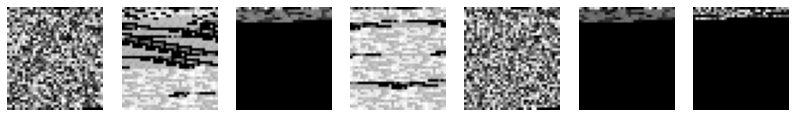

GoogleServices


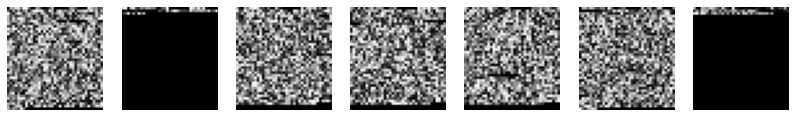

PlayStore


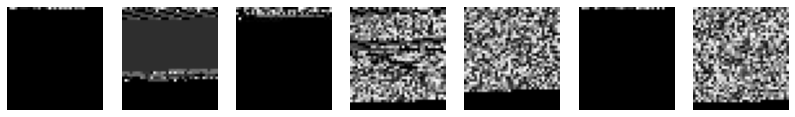

WhatsApp


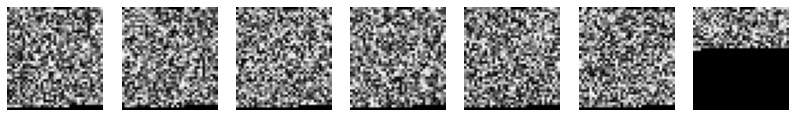

Instagram


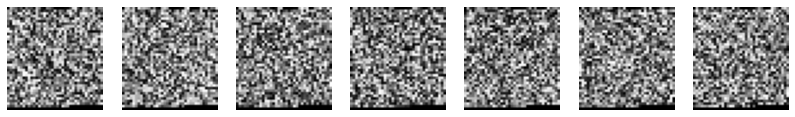

GMail


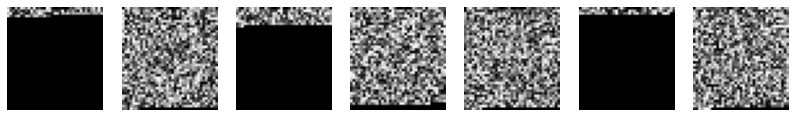

YouTube


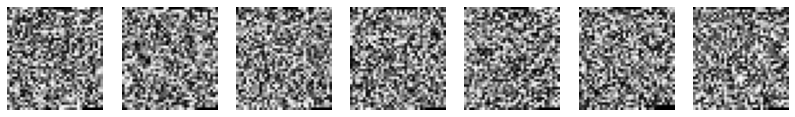

BitTorrent


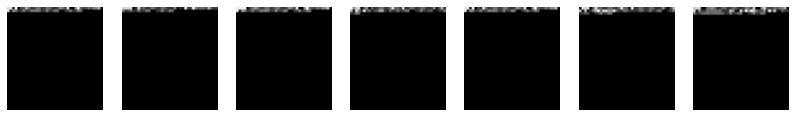

TeamViewer


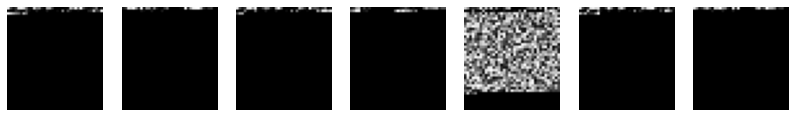

Ookla


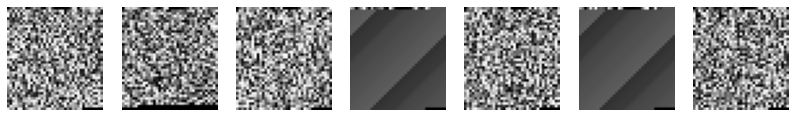

Pinterest


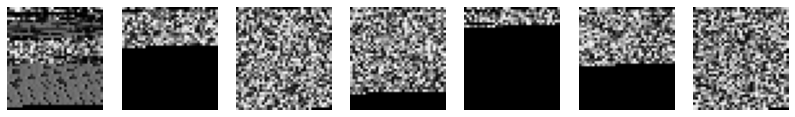

Messenger


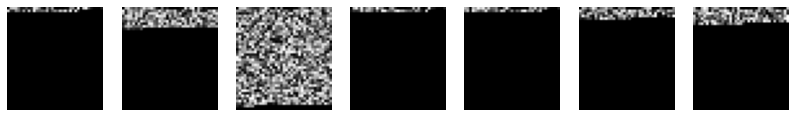

NetFlix


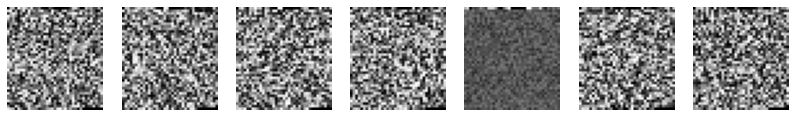

In [83]:
plot_class_imgs()

In [84]:
def plot_class_median(df = df_train.groupby("label").median().reset_index()): # k examples per class
    fig = plt.figure(figsize=(7, 7), dpi = 100)
    i = 1
    for label in df["label"].unique():

        df_label = df[df["label"] == label]
        x_label = MAX_BYTE_VALUE - df_label.drop("label", axis=1)
        imgs = x_label.values #, random_state=42
    
        ax = fig.add_subplot(3, 4, i)
        ax.set_title(label)
        ax.imshow(imgs[0].reshape(40,37), cmap="binary")
        ax.axis("off")
        i+=1

ValueError: num must be 1 <= num <= 12, not 13

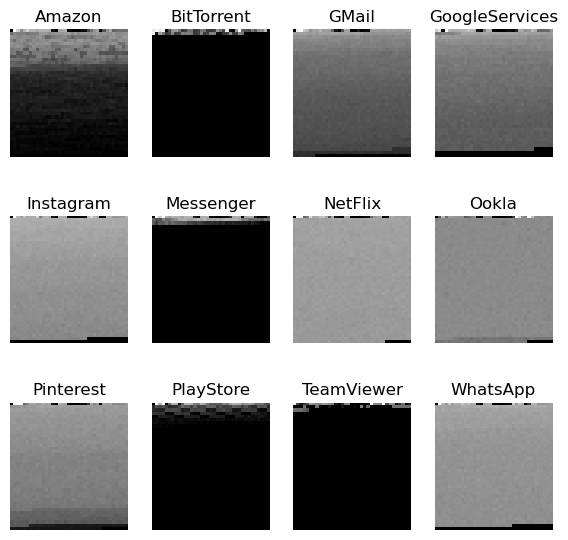

In [85]:
plot_class_median()

In [86]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf


In [87]:
from tensorflow import keras

In [88]:
cwd = os.getcwd()

In [41]:
cwd = os.getcwd()
train_file_path = '/'.join(cwd.split('/')[:-2]) + '/preprocessing/data/14_10000/train_14_10000.csv'
train_df = pd.read_csv(train_file_path)

In [89]:
# example data
dftrain_img=np.array(df_train.drop("label", axis=1)).reshape(83200,40,37)

dftrain_img.shape

(83200, 40, 37)

In [90]:
dfval_img=np.array(df_val.drop("label", axis=1)).reshape(20800,40,37)
dfval_img.shape

(20800, 40, 37)

In [91]:
dftest_img=np.array(df_test.drop("label", axis=1)).reshape(26000,40,37)
dftest_img.shape

(26000, 40, 37)

In [100]:

from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(df_train['label'])
y_val = to_categorical(df_val['label'])
y_test = to_categorical(df_test['label'])
y_train[0]

ValueError: invalid literal for int() with base 10: 'Amazon'

In [97]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(40,37,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [ ]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#train the model
model.fit(dftrain_img, y_train, validation_data=(dfval_img, y_val), epochs=10)

In [ ]:
#predict first 4 images in the test set
model.predict(dftest_img[:100]

In [ ]:
y_test[:100]